[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Nepal-College-of-Information-Technology/AI-Data-Science-Workshop-2024/blob/main/Day%205%3A%20Introduction%20to%20Machine%20Learning/Part2_Linear_Regression.ipynb)


# Linear Regression

In this notebook, we will implement and explore Linear Regression using Scikit-learn. Linear Regression is a supervised learning algorithm used for predicting continuous values.

---

## 1. What is Linear Regression?

Linear Regression is a statistical method that models the relationship between a dependent variable (Y) and one or more independent variables (X). The model assumes a linear relationship between the input variables (features) and the output (target).

![Linear Regression](dataset/Linear_Regression.png)


### Equation for Simple Linear Regression:
The equation for a simple linear regression model is:
\[
Y = b<sub>0</sub> + b<sub>1</sub> X
\]

Where:
- \( b<sub>0</sub> \) is the intercept,
- \( b<sub>1</sub> \) is the slope of the line,
- \( X \) is the independent variable (input),
- \( Y \) is the dependent variable (output).

---

## 2. Steps to Implement Linear Regression

We will use **Scikit-learn** to implement Linear Regression. Below are the steps we will follow:
1. Import the required libraries.
2. Generate or load a dataset.
3. Split the dataset into training and testing sets.
4. Train the Linear Regression model.
5. Make predictions on the test set.
6. Evaluate the model using Mean Squared Error (MSE) or other metrics.
7. Visualize the results.

---

## 3. Importing Libraries


In [21]:
# !pip install scikit-learn

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## 4. Generating a Simple Dataset (Area of House vs Price)

Let’s create a simple dataset where the area of a house (in square feet) is the independent variable, and the price of the house (in thousands) is the dependent variable.

In [26]:
# Preparing a dataset and adding some noise
X = np.linspace(1200, 12000,51).reshape(-1, 1)  # Area in square feet from 1200 to 12000
y = np.linspace(100, 1000, 51)  # Price in Lakhs from 100 to 1000
np.random.seed(42)
y += np.random.normal(0, 25, y.shape)  # Adding some noise to the data

In [28]:
X[50]

array([12000.])

## 5. Splitting the Dataset

We’ll split the dataset into a training set and a test set.

In [33]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
len(X_train), len(X_test)

(40, 11)

In [35]:
len(y_train), len(y_test)

(40, 11)

## 6. Training the Linear Regression Model

We will now train a Linear Regression model using the training data.

In [36]:
# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## 7. Making Predictions

Once the model is trained, we can use it to make predictions on the test data.

In [37]:
# Predict using the test data
y_pred = model.predict(X_test)

## 8. Evaluating the Model

We can evaluate the model’s performance using metrics like Mean Squared Error (MSE).

In [38]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 718.9799403126254


## 9. Visualizing the Results

Finally, let’s visualize the actual vs predicted values.

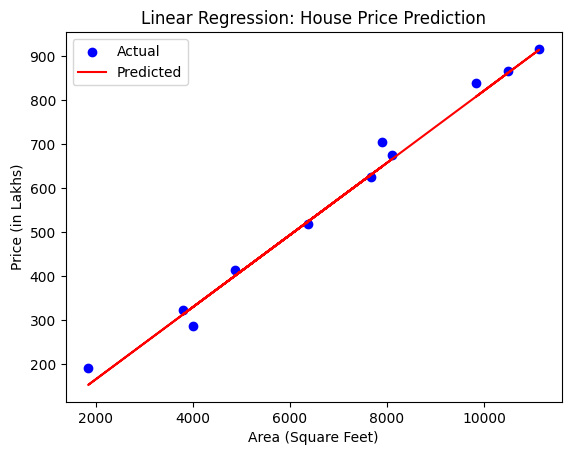

In [40]:
# Plot the results
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('Area (Square Feet)')
plt.ylabel('Price (in Lakhs)')
plt.title('Linear Regression: House Price Prediction')
plt.legend()
plt.show()

## Real World Example

In [41]:
# Load the dataset
housing_data = pd.read_csv('dataset/HousePrices.csv')

# Display the first few rows to understand the data
print(housing_data.head())

   Rooms  Distance  Value
0  6.575    4.0900   24.0
1  6.421    4.9671   21.6
2  7.185    4.9671   34.7
3  6.998    6.0622   33.4
4  7.147    6.0622   36.2


In [42]:
housing_data

,Rooms,Distance,Value
0,6.575,4.0900,24.0
1,6.421,4.9671,21.6
2,7.185,4.9671,34.7
3,6.998,6.0622,33.4
4,7.147,6.0622,36.2
...,...,...,...
501,6.593,2.4786,22.4
502,6.120,2.2875,20.6
503,6.976,2.1675,23.9
504,6.794,2.3889,22.0


In [43]:
# Selecting relevant features and the target variable (price)
# Assuming 'Rooms' is the feature and 'Value' is the target variable for this example
X = housing_data[['Rooms']]  # Independent variable: Rooms in the house
y = housing_data['Value']    # Dependent variable: Value of the house

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [44]:
# Training the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)


In [45]:

# Evaluating the model using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 46.144775347317264


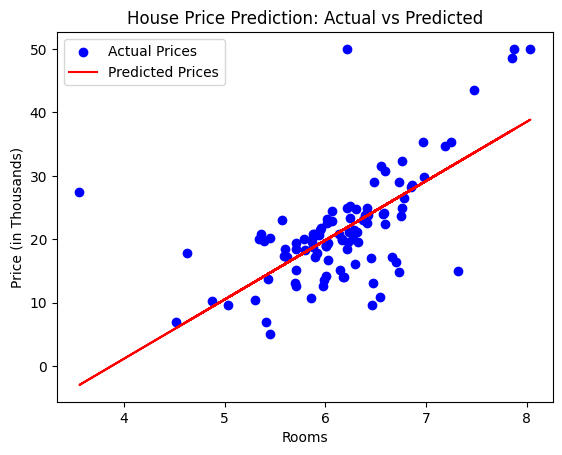

In [46]:
# Plotting the actual vs predicted prices
plt.scatter(X_test, y_test, color='blue', label='Actual Prices')
plt.plot(X_test, y_pred, color='red', label='Predicted Prices')
plt.xlabel('Rooms')
plt.ylabel('Price (in Thousands)')
plt.title('House Price Prediction: Actual vs Predicted')
plt.legend()
plt.show()

In [48]:
# Function to predict house value based on the number of rooms
def predict_house_value(rooms):
    rooms_df = pd.DataFrame({'Rooms': [rooms]})  # Use DataFrame with feature name 'Rooms'
    predicted_value = model.predict(rooms_df)
    return predicted_value[0]

# Ask the user for the number of rooms
rooms = float(input("Enter the number of rooms: "))
predicted_value = predict_house_value(rooms)
print(f"The predicted value of the house with {rooms} rooms is: {predicted_value:.2f} (in Lakh)")

The predicted value of the house with 5.8 rooms is: 17.97 (in Lakh)


In this notebook, we have implemented a simple Linear Regression model using Scikit-learn. We used the area of a house to predict its price. We trained the model, made predictions, evaluated its performance, and visualized the results.

---